In [2]:
import os, sys 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

from tqdm import tqdm

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

# Links to tutorials followed: 
- Dataset exploration [https://medium.com/m2mtechconnect/spotify-data-exploration-with-python-74dcc292031d]
- Predicting: [https://medium.com/m2mtechconnect/predicting-spotify-song-popularity-with-machine-learning-7a51d985359b]

In [5]:
data = pd.read_csv('../tracks.csv')
data.release_date = pd.to_datetime(data.release_date)
data = data[data.release_date.dt.year > 2000].reset_index(drop=True)
data

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,6catF1lDhNTjjGa2GxRQNN,You'll Never Walk Alone - Mono; 2002 Remaster,56,160187,0,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,0.484,0.265,0,-11.101,1,0.0322,0.394,0.000000,0.1490,0.2850,113.564,3
1,6Pkt6qVikqPBt9bEQy8iTz,A Lover's Concerto,41,159560,0,['The Toys'],['6lH5PpuiMa5SpfjoIOlwCS'],2020-03-13,0.671,0.867,2,-2.706,1,0.0571,0.436,0.000000,0.1390,0.8390,120.689,4
2,4aSw1QJIMwYSoDEgzgdCJL,Ferry Cross the Mersey - Mono; 2002 Remaster,40,141987,0,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,0.405,0.365,6,-10.226,0,0.0289,0.255,0.000005,0.1630,0.5880,104.536,4
3,0ZMMtH875IR2TfkyC4PolD,Don't Let the Sun Catch You Crying (Main) - Mono,34,157093,0,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,0.477,0.352,1,-14.165,1,0.0300,0.406,0.000000,0.1220,0.4780,106.773,4
4,1hx7X9cMXHWJjknb9O6Ava,The September Of My Years - Live At The Sands ...,26,187333,0,['Frank Sinatra'],['1Mxqyy3pSjf8kZZL4QVxS0'],2018-05-04,0.319,0.201,7,-17.796,1,0.0623,0.887,0.000000,0.9040,0.2390,117.153,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204742,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.518,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
204743,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.663,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
204744,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.314,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
204745,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.615,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4


C:\Users\tomoa\AppData\Local\Temp\ipykernel_24108\1488926076.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(data.corr()) #create correlation matrix


<Figure size 2500x2500 with 0 Axes>

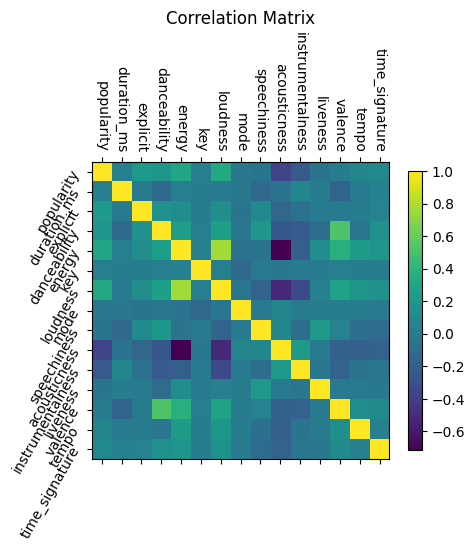

In [14]:
plt.figure(figsize=(25,25)) # make a new figure
pd.set_option("display.max_rows", 25, "display.max_columns", None)

plt.matshow(data.corr()) #create correlation matrix

# label axes, add information to the plot
labs = ['popularity', 'duration_ms', 'explicit',
        'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature']

plt.xticks(range(0, 15), labs, rotation=270) 
plt.yticks(range(0, 15), labs, rotation=60)
plt.title("Correlation Matrix")
plt.colorbar(shrink=0.75)
plt.show()

In [6]:
data_subset = data[data.columns[(data.dtypes != 'object').values].tolist()]

# Normalizing the data
data_subset_norm = (data_subset-data_subset.min()) /(data_subset.max()-data_subset.min()) 
data_subset_norm

,popularity,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0.56,0.028758,0.0,0.350472,0.488396,0.265,0.0,0.777978,1.0,0.033333,0.395582,0.0,0.149,0.285,0.494053,0.6
1,0.41,0.028642,0.0,0.946154,0.677094,0.867,0.181818,0.911541,1.0,0.05911,0.437751,0.0,0.139,0.839,0.52505,0.8
2,0.4,0.025386,0.0,0.350472,0.408678,0.365,0.545455,0.791899,0.0,0.029917,0.256024,0.000005,0.163,0.588,0.454777,0.8
3,0.34,0.028185,0.0,0.350472,0.481332,0.352,0.090909,0.72923,1.0,0.031056,0.407631,0.0,0.122,0.478,0.464509,0.8
4,0.26,0.033786,0.0,0.854521,0.321897,0.201,0.636364,0.671461,1.0,0.064493,0.890562,0.0,0.904,0.239,0.509667,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204742,0.5,0.046925,0.0,0.972740,0.565086,0.518,0.0,0.83573,0.0,0.030228,0.788153,0.0,0.0648,0.211,0.573805,0.8
204743,0.72,0.027481,0.0,0.976113,0.771948,0.663,0.0,0.871496,1.0,0.067495,0.141566,0.000297,0.0924,0.686,0.652961,0.8
204744,0.7,0.033836,0.0,0.969501,0.539859,0.314,0.636364,0.750581,0.0,0.042236,0.898594,0.00015,0.0874,0.0663,0.631227,0.8
204745,0.58,0.025389,0.0,0.994332,0.702321,0.615,0.909091,0.855761,1.0,0.035714,0.206827,0.000003,0.305,0.438,0.391665,0.8


In [8]:
X = data_subset_norm.drop(columns=['popularity'])
y = data_subset_norm.popularity
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [9]:
def RMSE(y_pred, y): 
    return np.sqrt(np.mean((y_pred - y) ** 2))

In [10]:
k_errors = [np.inf] # k=0 should have infinite error

for k in tqdm(range(1,50), total=50, desc='Running kNN'):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train) 
    Y_val_pred = model.predict(X_test)
    k_errors.append(RMSE(Y_val_pred, y_test))

Running kNN:  98%|█████████▊| 49/50 [42:59<00:52, 52.64s/it]
